In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Python_Dataset.xlsx")

In [3]:
df

,Customer_ID,Purchase_Date,Product_Name,Product_Category,Quantity,Total_Price
0,1046,2023-02-26,across,certain,17,134.96
1,1083,2023-10-10,attention,worry,13,178.36
2,1051,2023-04-04,raise,politics,13,176.99
3,1032,2023-04-16,scientist,push,6,187.37
4,1013,2023-02-26,free,word,7,103.51
...,...,...,...,...,...,...
995,1058,2022-12-02,leave,goal,9,11.15
996,1092,2023-02-03,eye,here,14,124.80
997,1007,2023-01-04,yes,over,7,12.20
998,1082,2023-08-13,toward,determine,9,97.94


In [4]:
df.shape

(1000, 6)

In [5]:
df.isnull().sum()

Customer_ID         0
Purchase_Date       0
Product_Name        0
Product_Category    0
Quantity            0
Total_Price         0
dtype: int64

In [6]:
df["Quantity"].sum()

10256

## Total Revenue generated

In [7]:
rev=df["Quantity"]*df["Total_Price"]
Tota_revenue=float(format(rev.sum(),".2f"))
Tota_revenue

1104066.89

<AxesSubplot:xlabel='tr'>

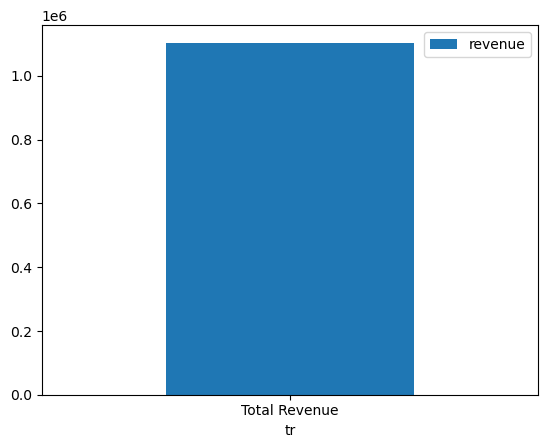

In [8]:
TR=pd.DataFrame({'tr':["Total Revenue"], 'revenue':[Tota_revenue]})
TR.plot.bar(x="tr",y="revenue",rot=0)

In [9]:
Total_Cus=sorted(df["Customer_ID"].unique())


In [10]:
product=df.Product_Name.unique()
len(product)

631

## Revenue Each month

In [11]:
d_jan=df[(df["Purchase_Date"]>="2023-01-01")&(df["Purchase_Date"]<="2023-01-31")]
Jan=(d_jan["Quantity"]*d_jan["Total_Price"]).sum()
Jan

103806.40000000001

In [12]:
d_feb=df[(df["Purchase_Date"]>="2023-02-01")&(df["Purchase_Date"]<="2023-02-28")]
Feb=(d_feb["Quantity"]*d_feb["Total_Price"]).sum()
Feb

89660.55

In [13]:
d_mar=df[(df["Purchase_Date"]>="2023-03-01")&(df["Purchase_Date"]<="2023-03-31")]
Mar=(d_mar["Quantity"]*d_mar["Total_Price"]).sum()
Mar

91472.73999999999

In [14]:
d_apr=df[(df["Purchase_Date"]>="2023-04-01")&(df["Purchase_Date"]<="2023-04-30")]
Apr=(d_apr["Quantity"]*d_apr["Total_Price"]).sum()
Apr

92335.42

In [15]:
d_may=df[(df["Purchase_Date"]>="2023-05-01")&(df["Purchase_Date"]<="2023-05-31")]
May=(d_may["Quantity"]*d_may["Total_Price"]).sum()
May

60712.09000000001

In [16]:
d_jun=df[(df["Purchase_Date"]>="2023-06-01")&(df["Purchase_Date"]<="2023-06-30")]
Jun=(d_jun["Quantity"]*d_jun["Total_Price"]).sum()
Jun

93039.78

In [17]:
d_jul=df[(df["Purchase_Date"]>="2023-07-01")&(df["Purchase_Date"]<="2023-07-31")]
Jul=(d_jul["Quantity"]*d_jul["Total_Price"]).sum()
Jul

106650.39

In [18]:
d_aug=df[(df["Purchase_Date"]>="2023-08-01")&(df["Purchase_Date"]<="2023-08-31")]
Aug=(d_aug["Quantity"]*d_aug["Total_Price"]).sum()
Aug

79301.58

In [19]:
d_sep=df[(df["Purchase_Date"]>="2023-09-01")&(df["Purchase_Date"]<="2023-09-30")]
Sep=(d_sep["Quantity"]*d_sep["Total_Price"]).sum()
Sep

81830.59

In [20]:
d_oct=df[(df["Purchase_Date"]>="2023-10-01")&(df["Purchase_Date"]<="2023-10-31")]
Oct=(d_oct["Quantity"]*d_oct["Total_Price"]).sum()
Oct

88420.24000000002

In [21]:
d_nov=df[(df["Purchase_Date"]>="2023-11-01")&(df["Purchase_Date"]<="2023-11-30")]
Nov=(d_nov["Quantity"]*d_nov["Total_Price"]).sum()
Nov

117608.48

In [22]:
d_dec=df[(df["Purchase_Date"]>="2022-12-01")&(df["Purchase_Date"]<="2022-12-31")]
Dec=(d_dec["Quantity"]*d_dec["Total_Price"]).sum()
Dec

94237.65000000001

<AxesSubplot:xlabel='month'>

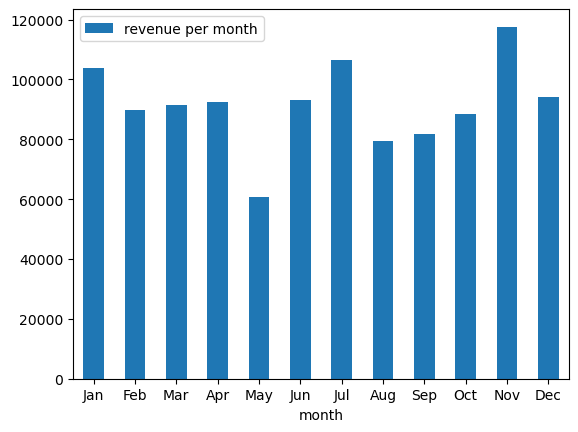

In [23]:
pt=pd.DataFrame({'month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                 'revenue per month':[Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]})

pt.plot.bar(x="month",y="revenue per month", rot=0)

# Avg Quantity Purchased by Customer

In [24]:
caq={}
for i in Total_Cus:
    caq[i]=df[df["Customer_ID"]==i].Quantity.mean()
#     print(i,"-",df[df["Customer_ID"]==i].Quantity.mean())

In [25]:
aqp=pd.DataFrame({'customer_id':caq.keys(),'avg_quantity_purchased':caq.values()})
aqp

,customer_id,avg_quantity_purchased
0,1001,8.666667
1,1002,9.750000
2,1003,7.800000
3,1004,8.375000
4,1005,10.071429
...,...,...
95,1096,9.066667
96,1097,10.900000
97,1098,9.769231
98,1099,7.000000


<AxesSubplot:xlabel='customer_id', ylabel='avg_quantity_purchased'>

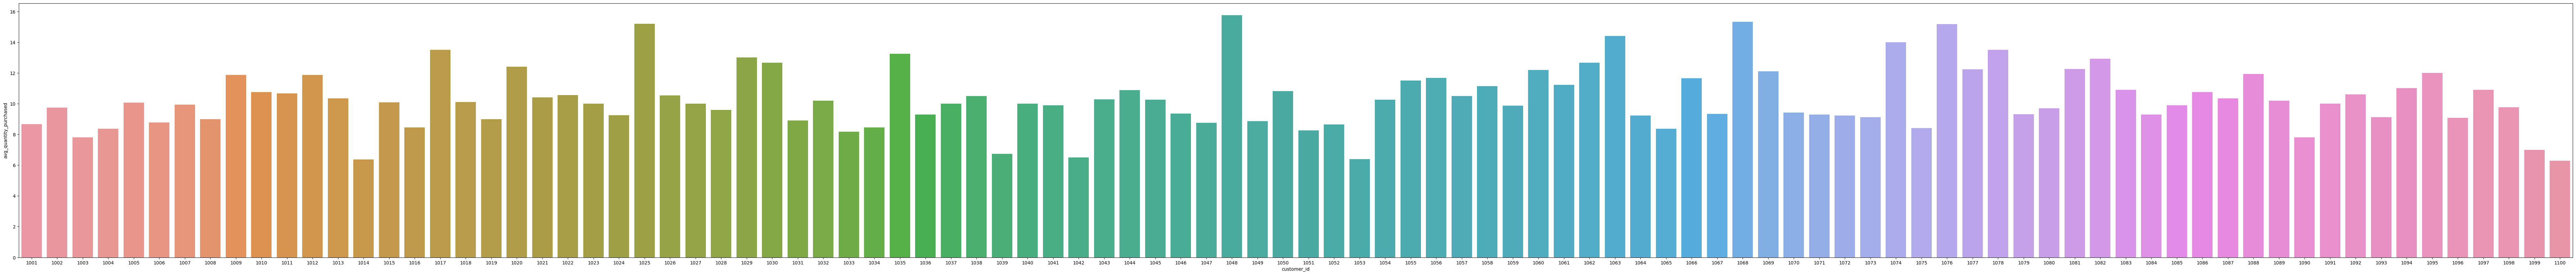

In [26]:
plt.figure(figsize=(100,10))
sns.barplot(x=aqp["customer_id"],y=aqp["avg_quantity_purchased"])

# Top 5 Products

In [27]:
pro=df["Product_Name"].unique()

In [28]:
Q=[]
for j in pro:
#     print(j,",",df[df["Product_Name"]==j].Quantity.sum())
    Q.append(df[df["Product_Name"]==j].Quantity.sum())

In [29]:
pq={}
for k,l in zip(pro,Q):
    pq[l]=k

In [30]:

pro_qua=pd.Series(pq)
pro_qua.sort_index(ascending=False).head()


76    special
64     degree
60      least
55     accept
54       True
dtype: object

In [31]:
Top=pd.DataFrame({'products':pq.values(),'Total_quantity':pq.keys()})
Top_5_Products=Top.nlargest(n=5,columns="Total_quantity")
Top_5_Products

,products,Total_quantity
46,special,76
33,degree,64
48,least,60
50,accept,55
44,True,54


<AxesSubplot:xlabel='products'>

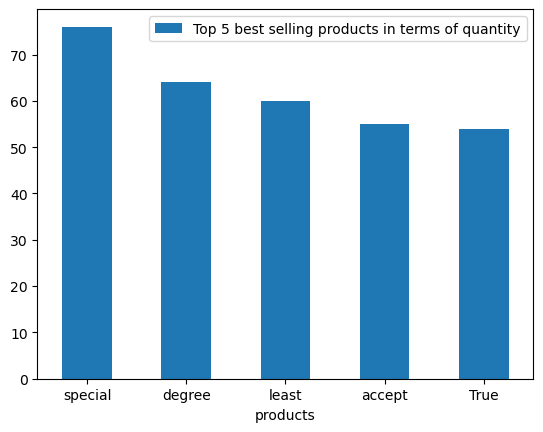

In [32]:
TOP_5=pd.DataFrame({'products':Top_5_Products.products,'Top 5 best selling products in terms of quantity':Top_5_Products.Total_quantity})
TOP_5.plot.bar(x="products",y="Top 5 best selling products in terms of quantity",rot=0)